In [18]:
#run this cell as-is
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
%matplotlib inline

#used for tests
from test_scripts.test_class import Test
test = Test()

data = test.load_ind('data')

X = data.drop('target', axis=1, inplace=False)
y = data['target']

### Complete the following code which:

- Performs a train-test split
  - test data is 20% of total data, `random_state` of 34

- creates StandardScaler and KnnClassifier objects

- scales the train and test data (correctly!)

- Sets up a loop which
  - sets the `n_neighbors` attribute in the knn object to the current iteration of the loop
     - (Why do we only include odd k values?  Why do we start with 3?)
  - fits the knn object on the training data
  - makes predictions on the test data
  - finds the f1_score of the test data
  - appends that score to `knn_scores`, a hither-to empty list
  
The code following the loop graphs the f1_score by k value, no need to alter anything in there

Graph should look like this:

![](test_obj/viz.png)

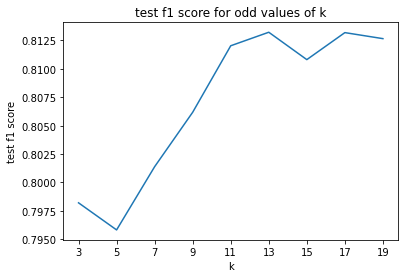

In [19]:
#complete the following code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=34)

scaler = StandardScaler()
knn = KNeighborsClassifier()

X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

knn_scores = []

for k in range(3,20,2):

    knn = knn.set_params(n_neighbors=k)
    
    knn.fit(X_train_scl, y_train)
    knn_preds = knn.predict(X_test_scl)
    
    knn_score = f1_score(y_test, knn_preds)
    
    knn_scores.append(knn_score)
    
fig, ax = plt.subplots()
ax.plot([x for x in range(3,20, 2)], knn_scores)
ax.set_xticks([x for x in range(3,20, 2)])
ax.set_xlabel('k')
ax.set_ylabel('test f1 score')
ax.set_title('test f1 score for odd values of k')
plt.savefig('test_obj/viz')
plt.plot();

### Which value of k should we choose as our model?

In [23]:
np.array(knn_scores)

array([0.79821074, 0.79582712, 0.80139027, 0.80617838, 0.81203008,
       0.81321983, 0.81081081, 0.81318681, 0.81265696])

> **Lowest complexity with highest F1:** k=11
>
>
> **Highest score regardless of complexity:** k=13